# Task 2 - EDA

In [1]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams
from nltk import word_tokenize

In [ ]:
# Download the NLTK resources if not already present
nltk.download('punkt')

### Combine all stories files into one file

In [63]:
def merge_data(csv_folder, output_file):
    merged_data = []
    csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv')]
    for f in csv_files:
        with open(os.path.join(csv_folder, f), 'r', encoding="utf8") as csv_file:
            reader = csv.reader(csv_file)
            if merged_data: # a small check to prevent duplicate header
                next(reader) 
            data = list(reader)
            merged_data.extend(data)

    with open(output_file, 'w', newline='', encoding="utf8") as merged_csv:
        writer = csv.writer(merged_csv)
        writer.writerows(merged_data)

In [64]:
csv_folder_path = "dataset"
output_csv_file = "dataset.csv"
merge_data(csv_folder_path, output_csv_file)

### Remove some special characters

In [65]:
def remove_special_characters(text):
    special_chars = ['@', '#', '$', '*', '&', "'", '"', '`', "،"]
    for char in special_chars:
        text = text.replace(char, '')
    return text

input_file = 'dataset.csv'
output_file = 'output_file.csv' 

df = pd.read_csv(input_file)
df['story'] = df['story'].apply(remove_special_characters)
df.to_csv(output_file, index=False)

### **Define data frame for global usage (Must be run at first)**

In [2]:
csv_file = "dataset.csv"
df = pd.read_csv(csv_file)

### Plot category counts

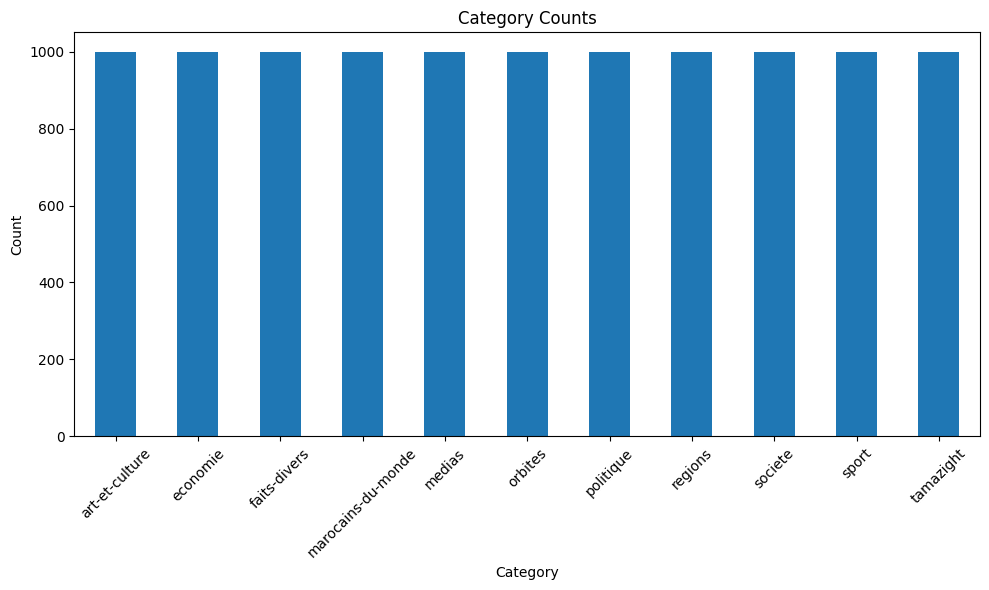

In [3]:
category_counts = df["topic"].value_counts()
plt.figure(figsize=(10, 6)) 
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Counts')
plt.xticks(rotation=45)  # rotate the x-axis labels for better readability
plt.tight_layout()  # to prevent clipping of labels
plt.show()

### Calculate total words

In [4]:
stories = df["story"]
total_words = 0
for story in stories:
    wordsArray = word_tokenize(story)
    total_words = total_words + len(wordsArray)

print(f"Total words: {total_words}")

Total words: 4140471


### Calculate total letters

In [5]:
stories = df["story"]
total_letters = 0
for story in stories:
    bigram_list = list(ngrams(story, 1))
    total_letters = total_letters + len(bigram_list)

print(f"Total letters: {total_letters}")

Total letters: 25191160


### Top frequent n-grams generally

In [6]:
def generate_ngrams(n):
    stories = df["story"]
    all_ngrams = []
    for story in stories:
        tokens = word_tokenize(story)
        n_grams = ngrams(tokens, n)
        all_ngrams.extend([' '.join(grams) for grams in n_grams])
        
    return(all_ngrams)

In [7]:
n = 3 # n here represnt number of words that we will combine in one string
all_ngrams = generate_ngrams(n)

In [8]:
def find_top_n(input_list, top_n):
    string_counts = {}
    for item in input_list:
        if item in string_counts:
            string_counts[item] += 1
        else:
            string_counts[item] = 1
    sorted_strings = sorted(string_counts.items(), key=lambda x:x[1], reverse=True)
    tops = []
    for n in range(top_n):
        tops.append(sorted_strings[n][0])
    return tops

In [9]:
n = 10
result = find_top_n(all_ngrams, n)
print(f"Top {n} highest repeated strings:\n", result)

Top 10 highest repeated strings:
 ['الملك محمد السادس', 'مشيرا إلى أن', 'في المائة من', 'لجريدة هسبريس الإلكترونية', 'فيروس كورونا المستجد', 'في تصريح لهسبريس', 'تصريح لجريدة هسبريس', 'في تصريح لجريدة', 'سعد الدين العثماني', 'حالة الطوارئ الصحية']


### Top frequent n-grams for specific class

In [10]:
def generate_ngrams_for_topic(topic, n):
    filtered_stories = df[df['topic'] == topic]["story"]
    all_ngrams = []
    for story in filtered_stories:
        tokens = word_tokenize(story)
        n_grams = ngrams(tokens, n)
        all_ngrams.extend([' '.join(grams) for grams in n_grams])
        
    return(all_ngrams)

In [11]:
n = 3 # n here represnt number of words that we will combine in one string
topic = "tamazight"
all_ngrams = generate_ngrams_for_topic(topic, n)

In [12]:
def find_top_n(input_list, top_n):
    string_counts = {}
    for item in input_list:
        if item in string_counts:
            string_counts[item] += 1
        else:
            string_counts[item] = 1
    sorted_strings = sorted(string_counts.items(), key=lambda x:x[1], reverse=True)
    tops = []
    for n in range(top_n):
        tops.append(sorted_strings[n][0])
    return tops

In [13]:
n = 10
result = find_top_n(all_ngrams, n)
print(f"Top {n} highest repeated strings for {topic} topic:\n", result)

Top 10 highest repeated strings for tamazight topic:
 ['الملكي للثقافة الأمازيغية', 'الطابع الرسمي للأمازيغية', 'المعهد الملكي للثقافة', 'تفعيل الطابع الرسمي', 'مشروع القانون التنظيمي', 'رأس السنة الأمازيغية', 'لتفعيل الطابع الرسمي', 'اللغة الأمازيغية في', 'بتفعيل الطابع الرسمي', 'الوطني للغات والثقافة']
